<h2>CLASIFICACION A - Regresion logistica</h2>

<h3>PASO 1 - Importo las librerias</h3>

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


<h3>PASO 2 - Cargo el dataframe</h3>

In [3]:
dataframe = pd.read_csv("titanic_processed.csv", encoding="ISO-8859-1")
dataframe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,22.0,0,0,8.0500,0,0,1
708,1,1,1,35.0,0,0,26.2875,0,0,1
709,0,3,1,21.0,0,0,8.4333,0,0,1
710,0,3,1,25.0,0,0,7.2250,1,0,0


In [4]:
# Creamos una copia para trabajar

dataset = dataframe.copy()
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0


<h3>PASO 3 - Limpieza de los datos</h3>

In [5]:
# Elimino los posibles errores NaN

dataset = dataset.dropna()
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,0,7.8958,0,0,1
1,1,3,0,26.0,0,0,7.9250,0,0,1
2,0,3,1,27.0,0,0,7.8958,0,0,1
3,0,2,1,32.0,2,0,73.5000,0,0,1
4,0,3,1,65.0,0,0,7.7500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,0,3,1,22.0,0,0,8.0500,0,0,1
708,1,1,1,35.0,0,0,26.2875,0,0,1
709,0,3,1,21.0,0,0,8.4333,0,0,1
710,0,3,1,25.0,0,0,7.2250,1,0,0


<h3>PASO 4 - Separo los datos - Labels</h3>

In [6]:
# Separo los datos de entrada y de salida

x_data = dataset.copy()
y_data = dataset.pop("Survived")
x_data.pop("Survived")

0      0
1      1
2      0
3      0
4      0
      ..
707    0
708    1
709    0
710    0
711    0
Name: Survived, Length: 712, dtype: int64

<h3>PASO 5 - Divido los datos de entrenamiento y de testeo</h3>

In [7]:
# Decido dividir los datos de entrenamiento y testeo en 80/20 respectivamente

x_entrenar, x_test, y_entrenar, y_test=train_test_split(x_data, y_data, test_size=0.2)

print("Porcentaje de datos de entrenamiento:", len(x_entrenar)*100/(len(x_entrenar)+len(x_test)))
print("Porcentaje de datos de test_________:", len(x_test)*100/(len(x_entrenar)+len(x_test)))

print(x_entrenar.shape)
print(y_entrenar.shape)
print(x_test.shape)
print(y_test.shape)

Porcentaje de datos de entrenamiento: 79.91573033707866
Porcentaje de datos de test_________: 20.084269662921347
(569, 9)
(569,)
(143, 9)
(143,)


<h3>PASO 6 - Planteo y evaluo el modelo de regresion logica</h3>

In [8]:
clasificador = linear_model.LogisticRegression(solver='lbfgs', C=100, max_iter=1000)
clasificador.fit(x_entrenar, y_entrenar)

LogisticRegression(C=100, max_iter=1000)

In [9]:
prediccion_entrena = clasificador.predict(x_entrenar)
print(prediccion_entrena)

[1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 

In [10]:
print(clasificador.score(x_test, y_test))
print(clasificador.score(x_entrenar, y_entrenar))

0.8321678321678322
0.804920913884007


In [11]:
prediccion_test = clasificador.predict(x_test)
print("Prediccion Testeo")
print(prediccion_test)
print("Datos reales de Testeo")
print(np.array(y_test))

Prediccion Testeo
[1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0]
Datos reales de Testeo
[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0
 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1]


<h3>PASO 7 - Grafico la relacion de datos de prueba y la prediccion</h3>

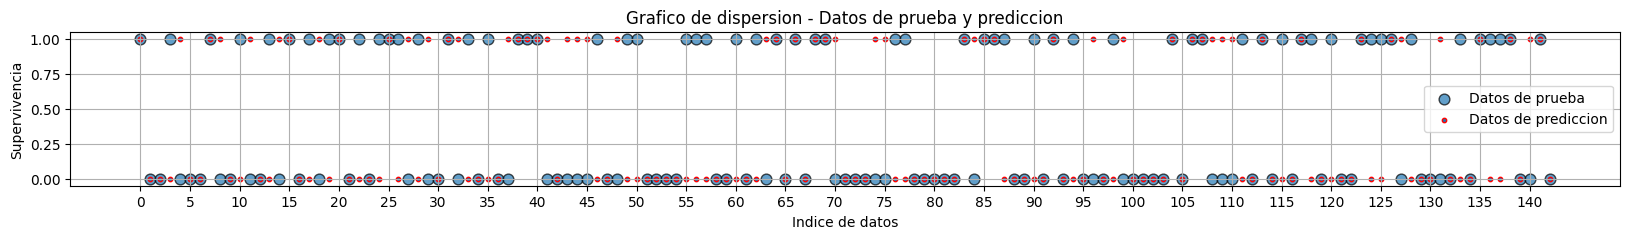

In [177]:
plt.figure(figsize=(20, 2))
x = np.arange(len(y_test))
label_x = np.arange(0, len(y_test), 5)
plt.scatter(x,y_test, alpha=0.7, marker="o", s=60, facecolor="C0", edgecolor="k", label="Datos de prueba")

plt.scatter(x,prediccion_test, alpha=1, marker="o", s=10, facecolor="C10", edgecolor="r", label="Datos de prediccion")

plt.title("Grafico de dispersion - Datos de prueba y prediccion")
plt.legend()
plt.grid()
plt.xticks(label_x)

plt.xlabel("Indice de datos")
plt.ylabel("Supervivencia")
    
plt.show()

<h2>CLASIFICACION B - Arboles de decision</h2>

<h3>PASO 1 - Importo las librerias necesarias</h3>

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

<h3>PASO 2 - Muestro datos de entrenamiento y testeo</h3>

In [134]:
# Verifico los datos de entrada para entrenamiento

x_entrenar.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
32,2,0,44.0,1,0,26.0000,0,0,1
178,2,0,30.0,0,0,12.3500,0,1,0
313,3,0,19.0,0,0,7.8792,0,1,0
547,3,1,27.0,1,0,14.4542,1,0,0
496,1,0,22.0,0,0,151.5500,0,0,1


In [135]:
# Verifico los datos de salida para entrenamiento

y_entrenar.head()

32     0
178    1
313    1
547    0
496    1
Name: Survived, dtype: int64

In [136]:
# Verifico los datos de entrada para testeo

x_test.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
646,1,0,19.0,0,2,26.2833,0,0,1
528,2,0,57.0,0,0,10.5000,0,0,1
591,3,1,24.0,0,0,8.0500,0,0,1
109,1,1,49.0,1,0,89.1042,1,0,0
283,1,1,56.0,0,0,26.5500,0,0,1


In [137]:
# Verifico los datos de salida para testeo

y_test.tail()

646    1
528    0
591    0
109    1
283    0
Name: Survived, dtype: int64

In [138]:
# Porcentaje de seleccion de datos

print("Porcentaje de datos de entrenamiento:", len(x_entrenar)*100/(len(x_entrenar)+len(x_test)))
print("Porcentaje de datos de test_________:", len(x_test)*100/(len(x_entrenar)+len(x_test)))

Porcentaje de datos de entrenamiento: 79.91573033707866
Porcentaje de datos de test_________: 20.084269662921347


<h3>PASO 3 - Creo el objeto arbol y lo ajusto</h3>

In [139]:
# Creacion del arbol de decision

arbol_decision=DecisionTreeClassifier(max_depth=4)

In [140]:
# Ajuste del arbol con los datos de entrenamiento

arbol_decision.fit(x_entrenar, y_entrenar)

DecisionTreeClassifier(max_depth=4)

<h3>PASO 4 - Realizo la prediccion con score</h3>

In [141]:
# Prediccion desde los datos de testeo

arbol_decision.score(x_test, y_test)

0.8041958041958042

In [142]:
# Verifico que no haya sobre entrenamiento del modelo

arbol_decision.score(x_entrenar, y_entrenar)

0.8506151142355008

<h3>PASO 5 - Grafico el arbol de decision (Graphviz)</h3>

In [143]:
# Genero una lista con los titulos de las columnas de datos de entrada

feature = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

In [144]:
# Exportacion del grafico con el modulo Graphviz

export_graphviz(arbol_decision, out_file="arbol_titanic.dot", class_names=["0", "1"], feature_names=feature, impurity=False, filled=True)

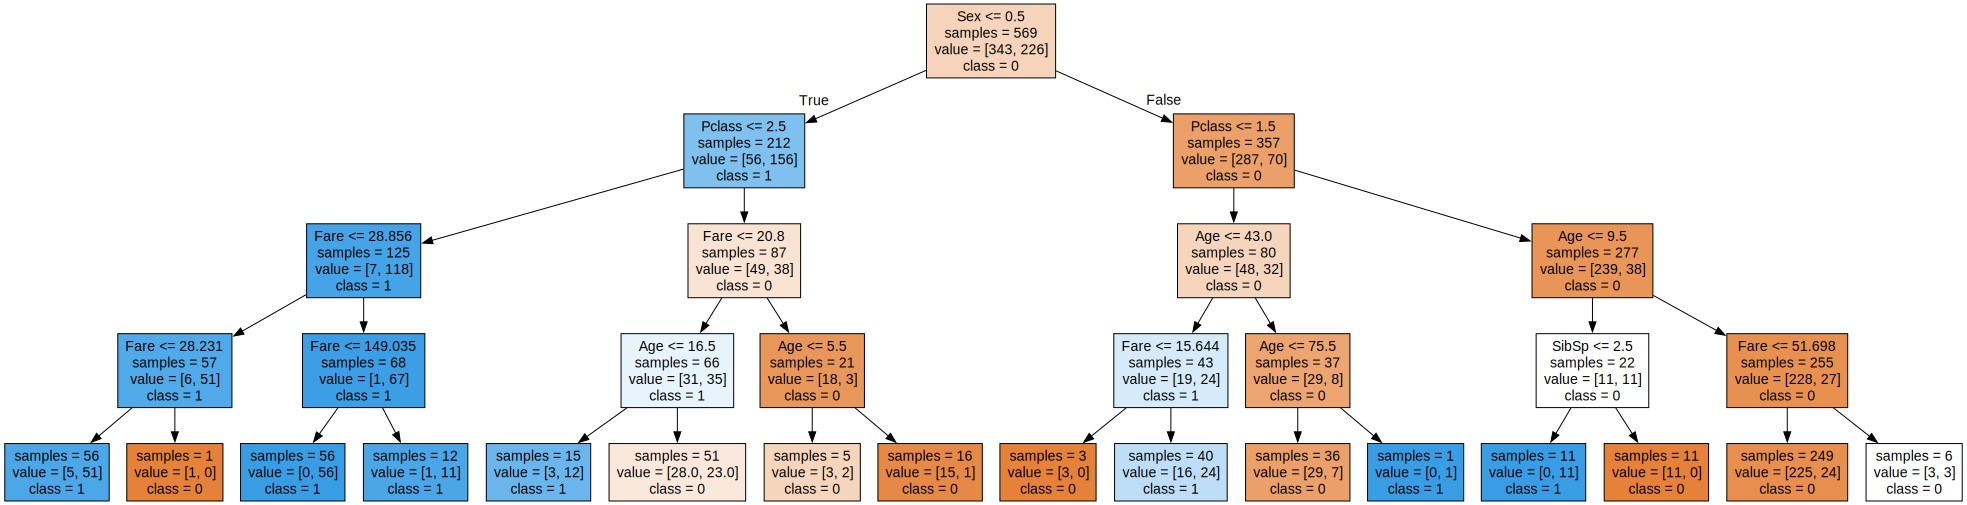

In [145]:
# Leo el grafico exportado

with open("arbol_titanic.dot") as tree:
    dot_graph=tree.read()
graphviz.Source(dot_graph)

<h3>PASO 6 - Analisis del resultado (feature_importances_)</h3>

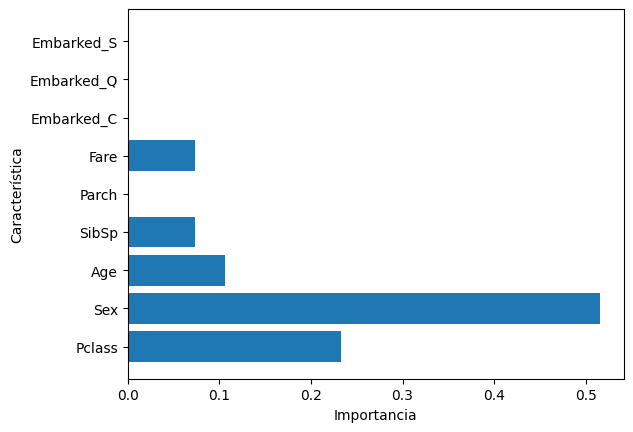

In [146]:
# Armo un grafico para analizar que caracteristicas fueron mas predominantes para hacer la clasificacion de la data

feature_len=len(feature)

plt.barh(range(feature_len),arbol_decision.feature_importances_)
plt.yticks(np.arange(feature_len),feature)
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()